In [1]:
import os
import sys 
import pandas as pd
from train_models import train_dl_model, LOOK_BACK, PREDICT_N

sys.path.append('../')
from lstm import apply_model

Compilation Time :  0.0029501914978027344
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 561)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 52, 16)           73984     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 52, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 52, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                   

2024-01-19 10:32:26.264369: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-19 10:32:26.266451: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


366/366 [==============================] - 7s 14ms/step - loss: 0.0559 - accuracy: 0.1230 - mape: 316.3048 - mse: 0.0394 - val_loss: 0.0468 - val_accuracy: 0.0984 - val_mape: 260.5961 - val_mse: 0.0345
Epoch 2/10
366/366 [==============================] - 5s 14ms/step - loss: 0.0426 - accuracy: 0.0820 - mape: 333.6854 - mse: 0.0355 - val_loss: 0.0360 - val_accuracy: 0.0984 - val_mape: 234.4278 - val_mse: 0.0301
Epoch 3/10
366/366 [==============================] - 5s 13ms/step - loss: 0.0335 - accuracy: 0.0601 - mape: 232.7182 - mse: 0.0302 - val_loss: 0.0294 - val_accuracy: 0.1148 - val_mape: 397.8331 - val_mse: 0.0250
Epoch 4/10
366/366 [==============================] - 5s 13ms/step - loss: 0.0290 - accuracy: 0.0820 - mape: 222.7386 - mse: 0.0264 - val_loss: 0.0271 - val_accuracy: 0.1066 - val_mape: 172.2218 - val_mse: 0.0247
Epoch 5/10
366/366 [==============================] - 5s 13ms/step - loss: 0.0249 - accuracy: 0.0984 - mape: 179.3281 - mse: 0.0221 - val_loss: 0.0237 - val_ac

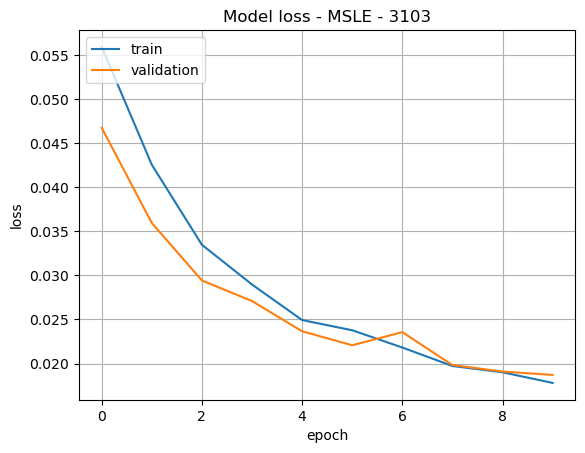

CPU times: user 4min 58s, sys: 20.1 s, total: 5min 18s
Wall time: 3min 36s


In [2]:
%%time 

city = '3103'

FILENAME_DATA = f'../data/dengue_{city}.csv' 

end_date = '2023-11-01'

train_dl_model(city, doenca = 'dengue', end_date_train = None, ratio = 0.75 , end_date = end_date, plot = True, filename_data = FILENAME_DATA, min_delta = 0.001, label = 't1', lr = 0.0001, epochs = 200)
    


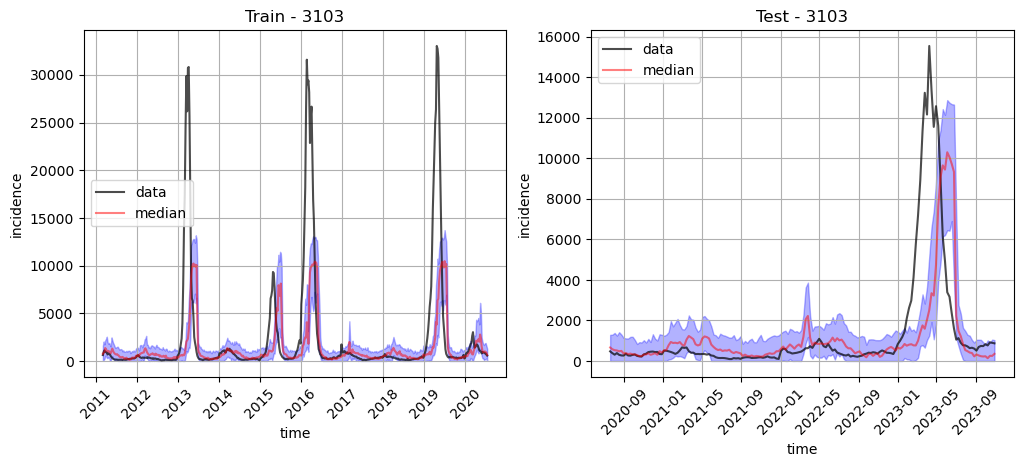

CPU times: user 5min 21s, sys: 28.1 s, total: 5min 49s
Wall time: 4min 2s


In [3]:
%%time 

metrics = apply_model(city, ini_date = None, 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = None, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = 0.75,
                    label_pred= f'dengue_{city}',
                    model_name = f'trained_{city}_dengue_t1', 
                    filename = f'../data/dengue_{city}.csv', plot = True)